# Real-Time-like ECG Processing (Simulated)

C:\Users\Patryk\AppData\Local\Temp\ipykernel_772\1650336656.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


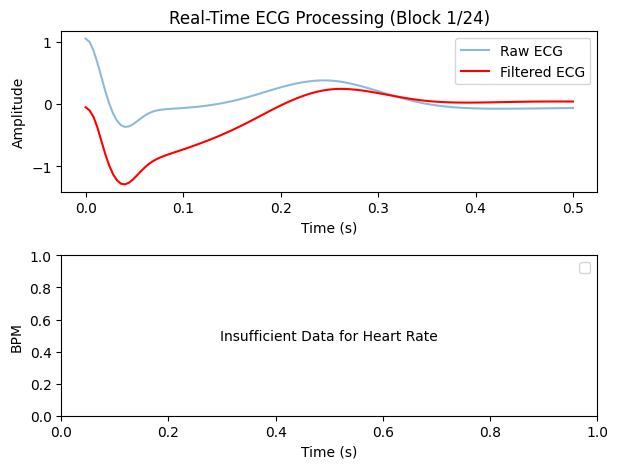

c:\Python313\Lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


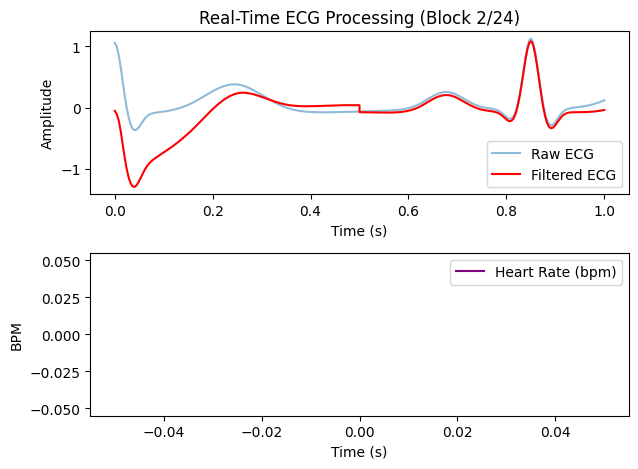

c:\Python313\Lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


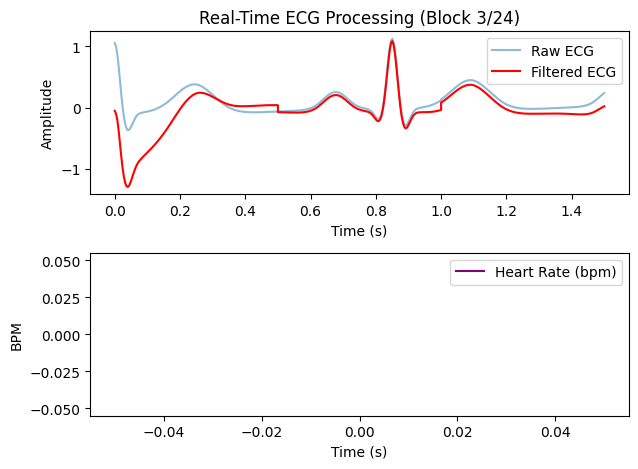

c:\Python313\Lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


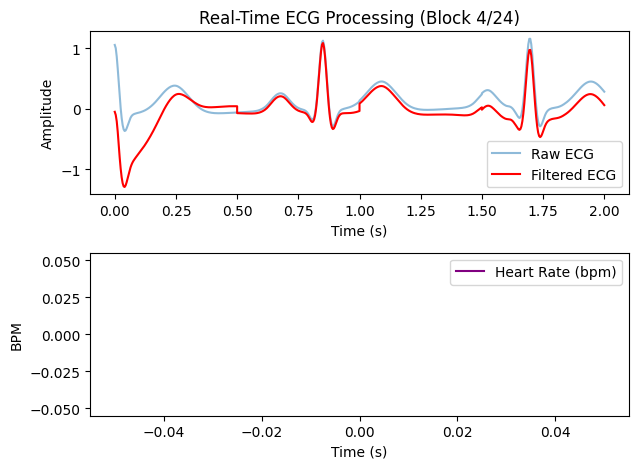

c:\Python313\Lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


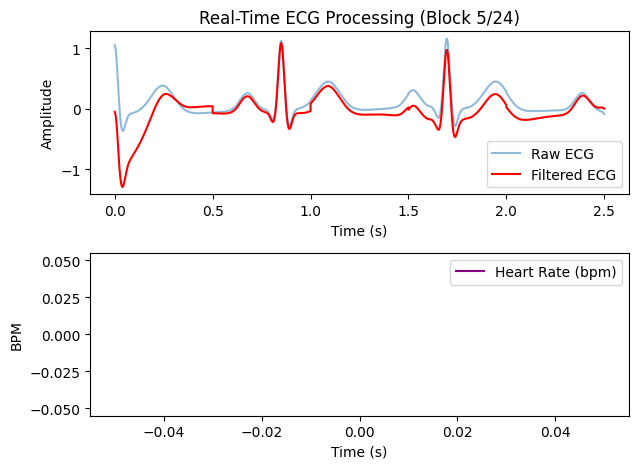

c:\Python313\Lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


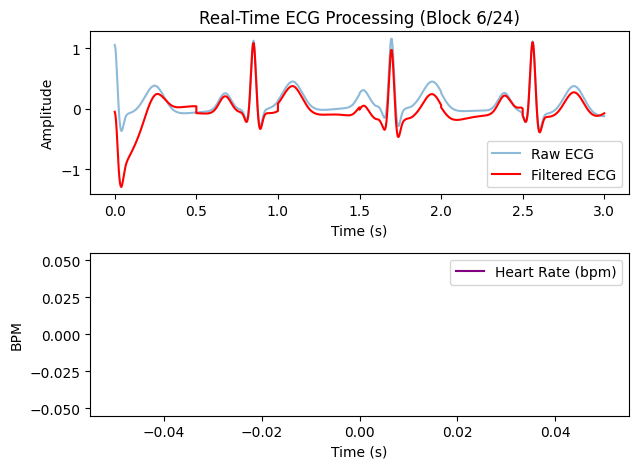

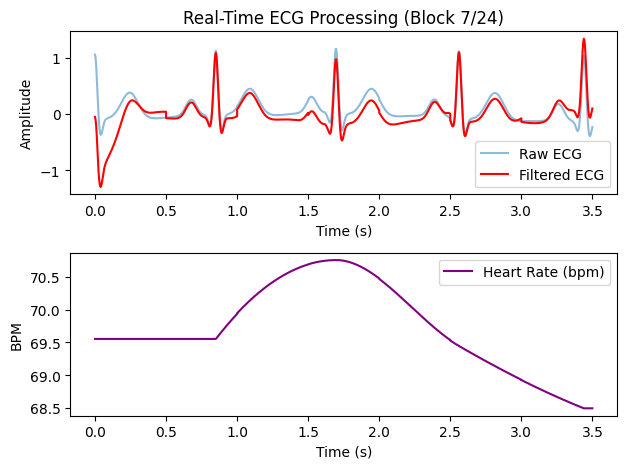

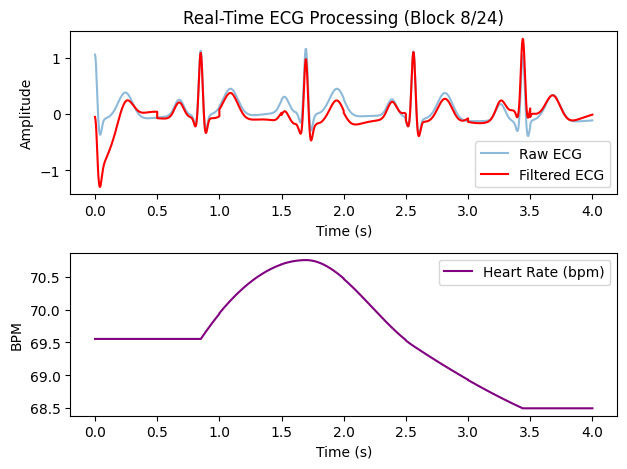

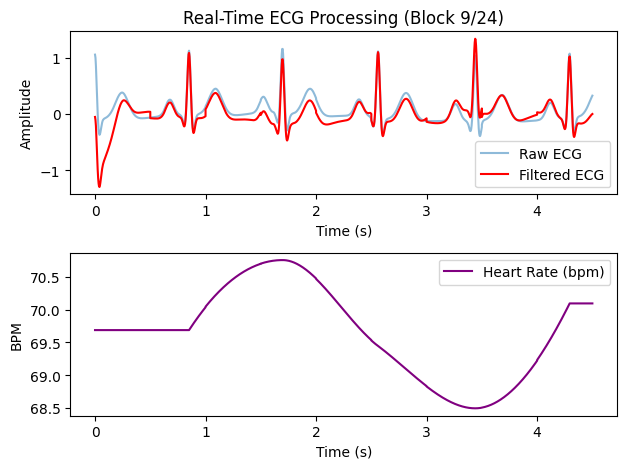

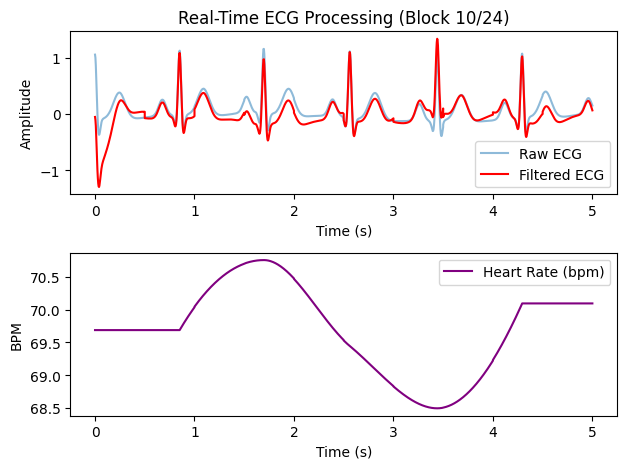

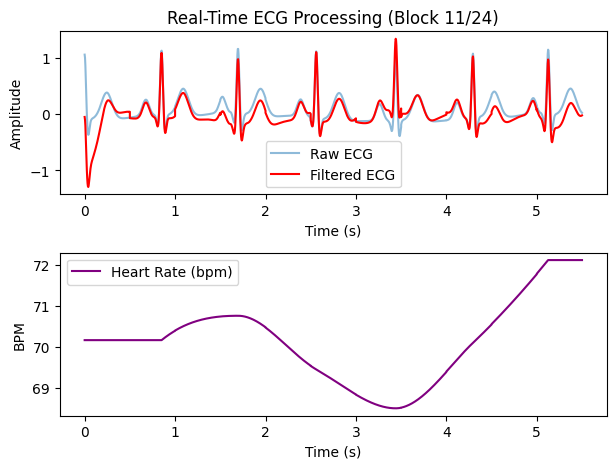

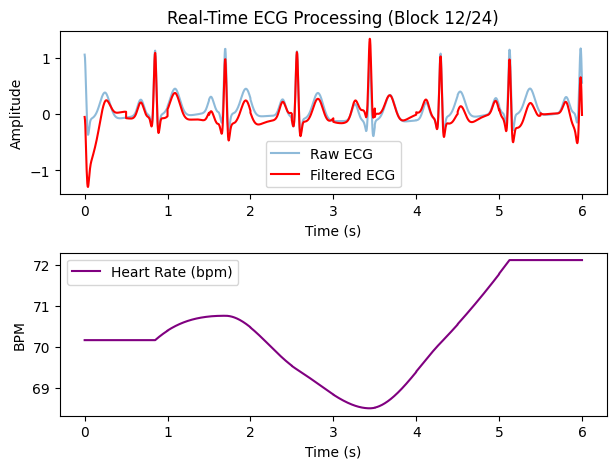

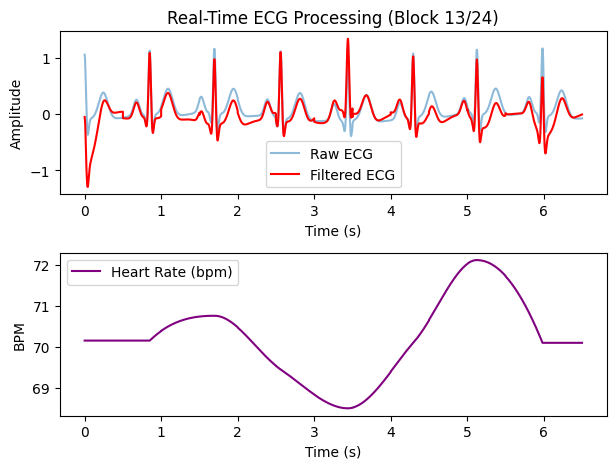

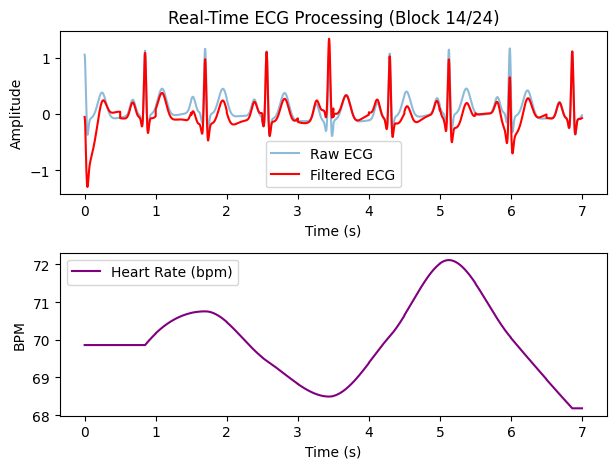

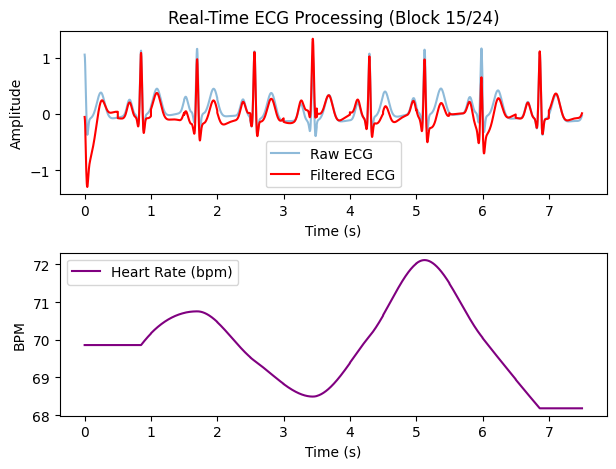

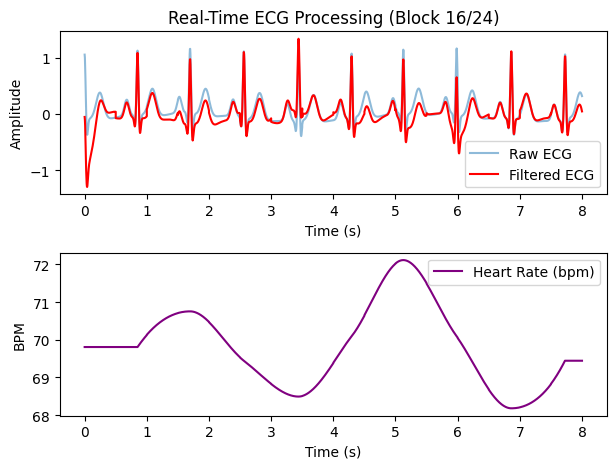

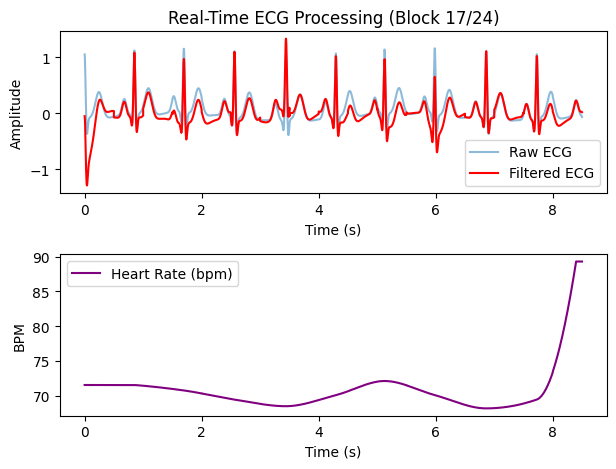

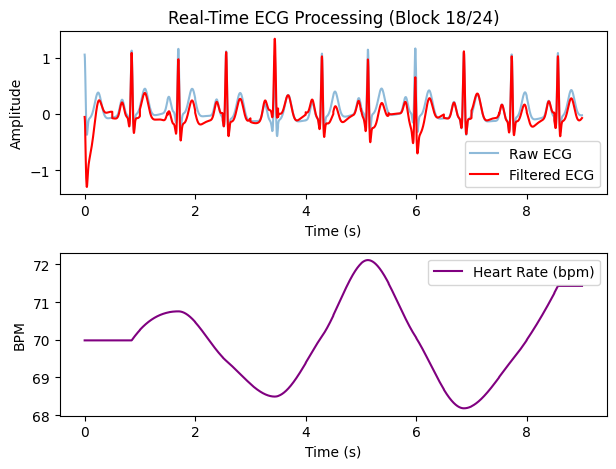

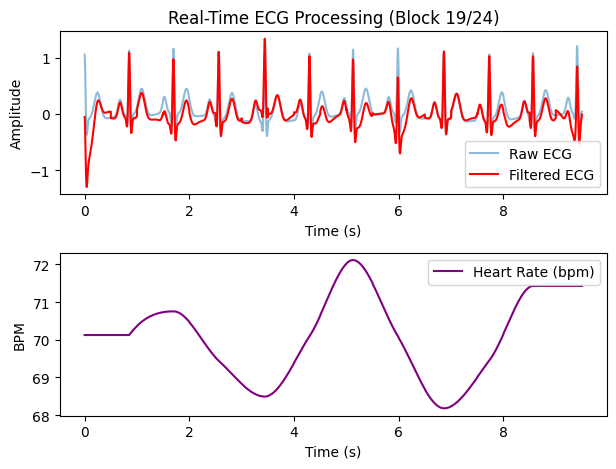

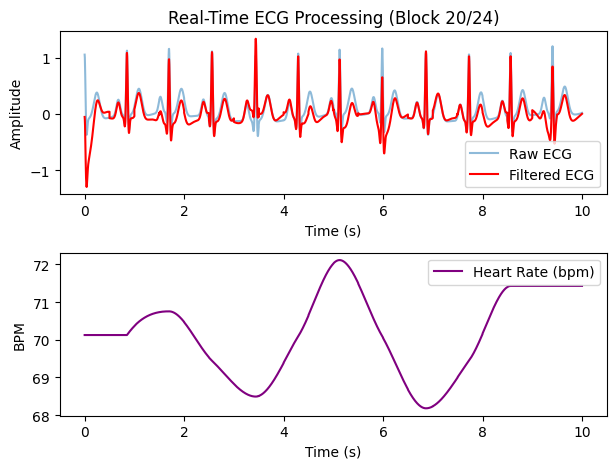

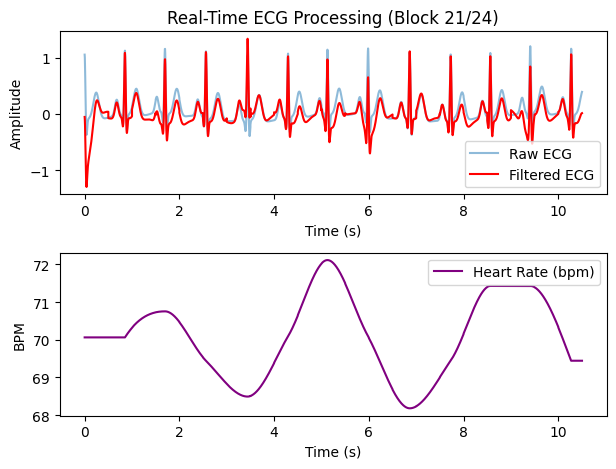

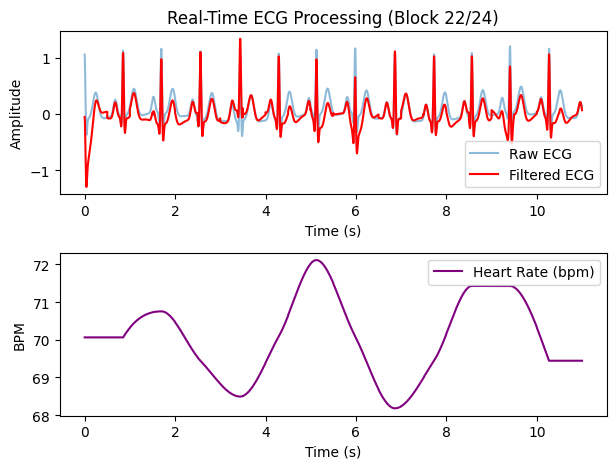

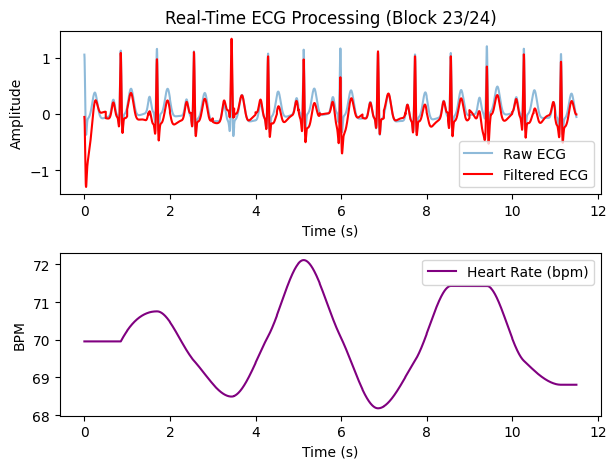

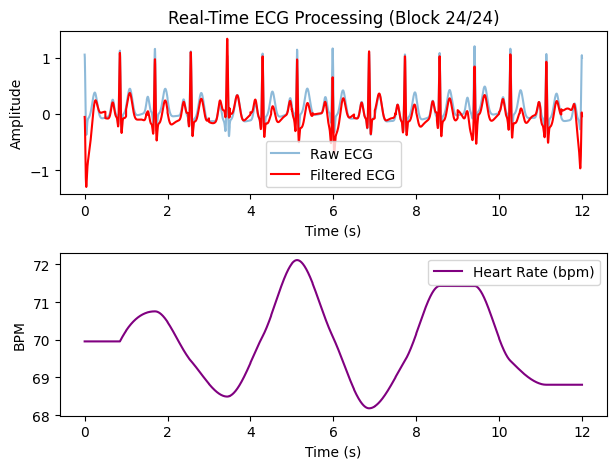

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
from scipy.signal import butter, filtfilt

# ECG signal parameters
sampling_rate = 250 # Hz
duration = 12  # seconds
block_size = 125  # samples per block
ecg = nk.ecg_simulate(duration=duration, sampling_rate=sampling_rate)
n_blocks = len(ecg) // block_size

# Bandpass filter design (1–50 Hz)
def bandpass_filter(signal, fs, lowcut=1, highcut=50, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype="band")
    return filtfilt(b, a, signal)

# Process and display in "real-time" blocks
filtered_full = []
time_full = []
min_blocks_for_peak_detection = 2  # Wait until at least 2 blocks are processed

for i in range(n_blocks):
    start = i * block_size
    end = (i + 1) * block_size
    block = ecg[start:end]
    filtered_block = bandpass_filter(block, sampling_rate)
    filtered_full.extend(filtered_block)

    time_block = np.linspace(start / sampling_rate, end / sampling_rate, block_size)
    time_full.extend(time_block)

    plt.clf()

    plt.subplot(2, 1, 1)
    plt.plot(time_full, ecg[:len(filtered_full)], label='Raw ECG', alpha=0.5)
    plt.plot(time_full, filtered_full, label='Filtered ECG', color='red')
    plt.title(f'Real-Time ECG Processing (Block {i + 1}/{n_blocks})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()


    if (i + 1) >= min_blocks_for_peak_detection:
        # Detect R-peaks in accumulated signal
        try:
            _, rpeaks = nk.ecg_peaks(np.array(filtered_full), sampling_rate=sampling_rate)
            rpeaks_idx = rpeaks['ECG_R_Peaks']
            hr = nk.ecg_rate(rpeaks_idx, sampling_rate=sampling_rate, desired_length=len(filtered_full))
            plt.subplot(2, 1, 2)
            plt.plot(time_full, hr, label='Heart Rate (bpm)', color='purple')
            plt.xlabel('Time (s)')
            plt.ylabel('BPM')
            plt.legend()
        except TypeError as e:
            print(f"Error during peak detection in block {i+1}: {e}")
            plt.subplot(2, 1, 2)
            plt.text(0.5, 0.5, 'Heart Rate Calculation Error', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
            plt.xlabel('Time (s)')
            plt.ylabel('BPM')
            plt.legend()
    else:
        plt.subplot(2, 1, 2)
        plt.text(0.5, 0.5, 'Insufficient Data for Heart Rate', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        plt.xlabel('Time (s)')
        plt.ylabel('BPM')
        plt.legend()

    plt.tight_layout()
    plt.pause(0.5)

plt.show()

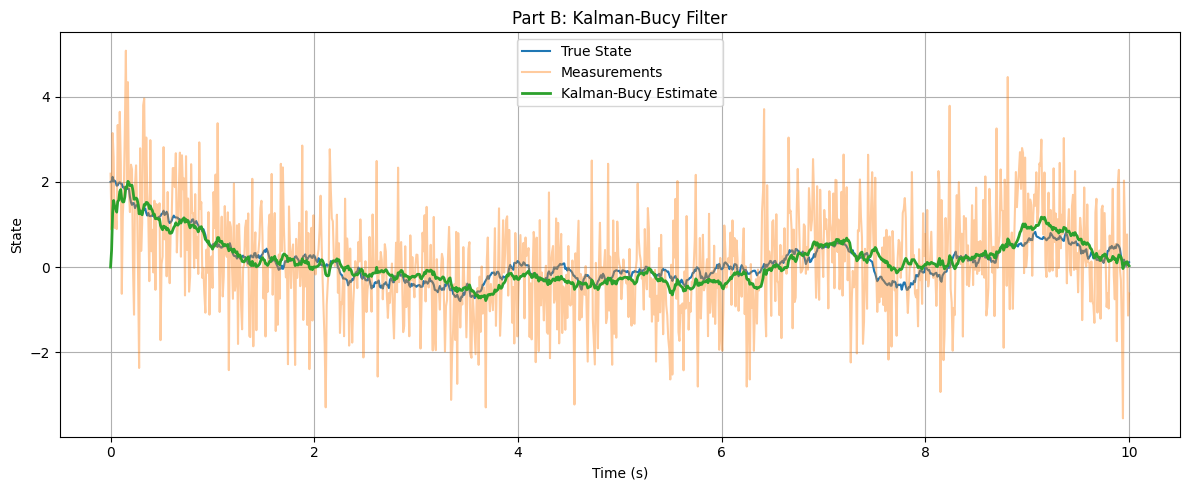

In [25]:

# Time parameters
dt = 0.01
T = 10
N = int(T / dt)
t = np.linspace(0, T, N)

# System parameters
a = -1.2
Q = 0.3
R = 1.2

# True state and measurement generation
x_true = np.zeros(N)
y_meas = np.zeros(N)

x_true[0] = 2
y_meas[0] = x_true[0] + np.random.normal(0, np.sqrt(R))

for i in range(1, N):
    w = np.random.normal(0, np.sqrt(Q * dt))
    v = np.random.normal(0, np.sqrt(R))
    x_true[i] = x_true[i - 1] + dt * a * x_true[i - 1] + w
    y_meas[i] = x_true[i] + v

# Kalman-Bucy filter initialization
x_est = np.zeros(N)
P = 1.0  # Initial error covariance

for i in range(1, N):
    # Prediction step
    x_pred = x_est[i - 1] + dt * a * x_est[i - 1]
    P_pred = P + Q * dt

    # Kalman gain
    K = P_pred / (P_pred + R)

    # Update step
    x_est[i] = x_pred + K * (y_meas[i] - x_pred)
    P = (1 - K) * P_pred

# Plot Kalman-Bucy results
plt.figure(figsize=(12, 5))
plt.plot(t, x_true, label="True State")
plt.plot(t, y_meas, label="Measurements", alpha=0.4)
plt.plot(t, x_est, label="Kalman-Bucy Estimate", linewidth=2)
plt.title("Part B: Kalman-Bucy Filter")
plt.xlabel("Time (s)")
plt.ylabel("State")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
